In [1]:
%load_ext line_profiler
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import time
import pickle

from collections import Counter, defaultdict, OrderedDict, namedtuple
import random
import copy
import bisect
import heapq

import multiprocessing as mp
from multiprocessing import Pool

import warnings
warnings.filterwarnings('error')

In [2]:
records=pd.read_csv('data/ydata-fp-td-clicks-v2_0.20111005', 
                    sep=' ',
                    names=['timestamp','id','clicked'],
                    usecols=[0,1,2],)

In [3]:
records.head()

,timestamp,id,clicked
0,1317772490,id-570650,0
1,1317772491,id-570332,0
2,1317772492,id-568437,0
3,1317772492,id-571362,0
4,1317772492,id-568890,0


In [4]:
records.tail()

,timestamp,id,clicked
1373872,1317858893,id-575230,0
1373873,1317858893,id-575157,0
1373874,1317858893,id-575000,0
1373875,1317858893,id-572306,0
1373876,1317858893,id-575115,0


In [5]:
with open('save/lifespans','rb') as f:
    lifespans = pickle.load(f)

24 1317830699 1317783600 13.083055555555555


51

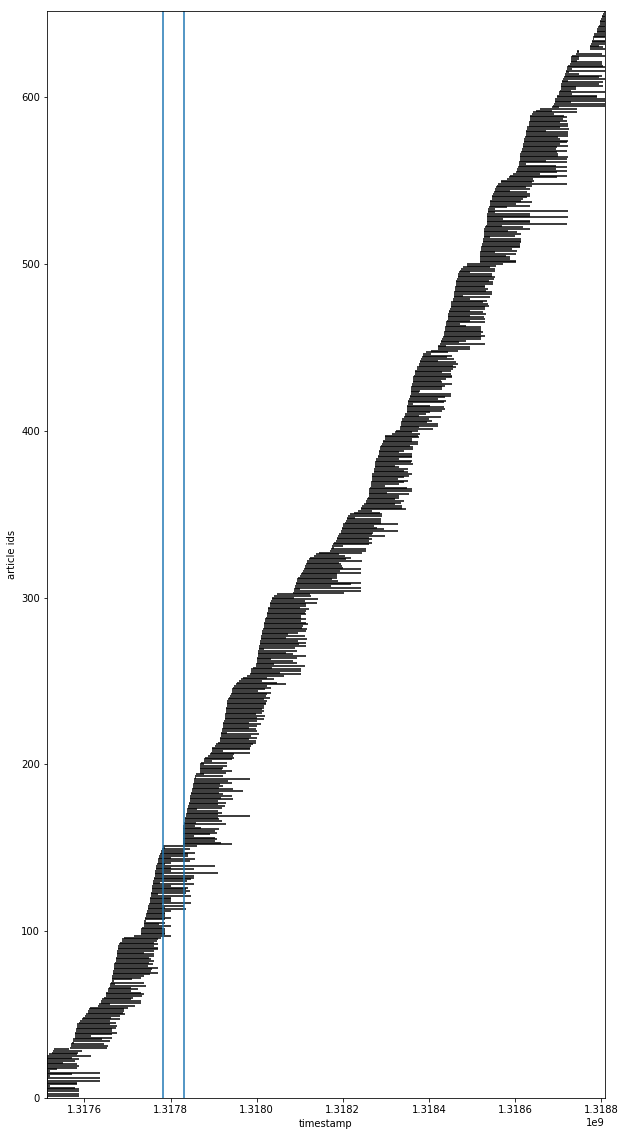

In [6]:
plt.figure(figsize=(10,20))
y=0
for start,stop in lifespans.values():
    plt.hlines(y, xmin=start, xmax=stop)
    #plt.scatter(np.arange(start,stop,1000),[y for j in range(start,stop,1000)], marker='.')
    y+=1
plt.xlabel('timestamp')
plt.ylabel('article ids')
plt.xlim(1317513291, 1318809293)
plt.ylim(0,652)

l=[] # min heap with items like: (stop, start, arm)
global_max=0
for i in lifespans.items():
    arm=i[0]
    start,stop=i[1]
    while l and l[0][0]<start:
        heapq.heappop(l)
        if len(l)>=24:
            min_stop=l[0][0]
            max_start=max(l, key=lambda i:i[1])[1]
            if min_stop-max_start>=3600*12:
                plt.axvline(min_stop)
                plt.axvline(max_start)
                pool=[i[2] for i in l]
                print(len(l), min_stop, max_start, (min_stop-max_start)/3600)
    heapq.heappush(l,(stop,start,arm)) # min stop (earliest expiring)
    
    global_max=max(global_max, len(l))
global_max

In [7]:
start=records[records.timestamp==1317783600].index[0]
stop=records[records.timestamp==1317830699].index[-1]
slice=records.iloc[start:stop+1]
slice.head()

,timestamp,id,clicked
350160,1317783600,id-572194,0
350161,1317783600,id-572582,0
350162,1317783600,id-569364,0
350163,1317783600,id-569270,0
350164,1317783600,id-573053,0


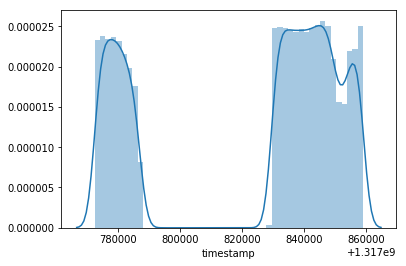

In [9]:
sns.distplot(records.timestamp)

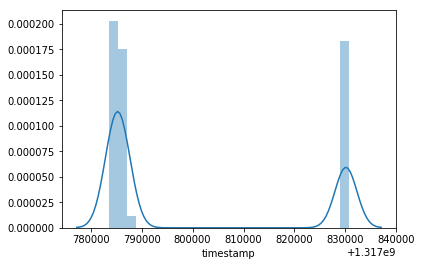

In [10]:
sns.distplot(slice.timestamp)

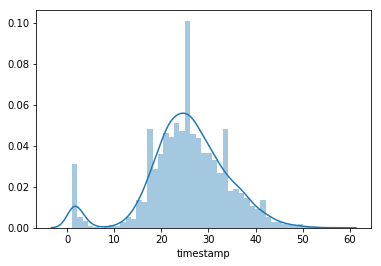

In [8]:
sns.distplot(slice.timestamp.value_counts())

In [11]:
slice.timestamp.value_counts().describe()

count    5038.000000
mean       25.570266
std         8.608354
min         1.000000
25%        21.000000
50%        26.000000
75%        31.000000
max        57.000000
Name: timestamp, dtype: float64

In [24]:
slice.timestamp.value_counts()

1317829809    57
1317829792    53
1317830377    53
1317830510    52
1317829965    52
1317829959    51
1317830339    51
1317830021    50
1317830563    50
1317830469    49
1317830004    49
1317830571    49
1317830071    49
1317830379    49
1317829741    49
1317829505    49
1317830596    49
1317830101    49
1317830278    48
1317830492    48
1317830688    48
1317830642    48
1317829564    47
1317829537    47
1317829863    47
1317829993    47
1317830332    47
1317829508    47
1317830384    47
1317829540    47
              ..
1317787311     1
1317787398     1
1317787368     1
1317787323     1
1317787450     1
1317787236     1
1317787434     1
1317787437     1
1317787306     1
1317787242     1
1317787445     1
1317787469     1
1317787471     1
1317787350     1
1317787414     1
1317787478     1
1317787467     1
1317787294     1
1317787423     1
1317787405     1
1317787277     1
1317787252     1
1317787316     1
1317787240     1
1317787223     1
1317787304     1
1317787443     1
1317787415    

In [112]:
def form_bins(t):
    ts=slice.timestamp//t*t
    ts.value_counts().sort_index().plot()
    plt.xlabel('timestamp')
    plt.ylabel('G(t)')
    #plt.xlim(right=1317787250)
    
    plt.figure()
    sns.distplot(ts.value_counts())
    plt.xlabel('G(t)')
    print(ts.value_counts().describe())

count       18.000000
mean      7156.833333
std       2820.125117
min        274.000000
25%       6668.500000
50%       7448.000000
75%       8173.250000
max      10308.000000
Name: timestamp, dtype: float64


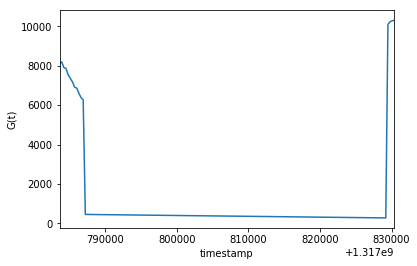

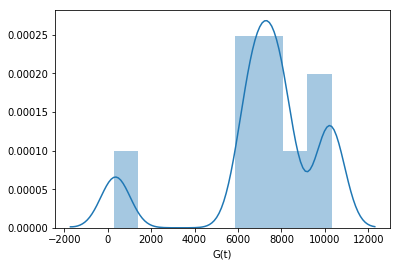

In [122]:
form_bins(60*5)

count      86.000000
mean     1497.941860
std       468.736985
min        79.000000
25%      1340.000000
50%      1519.000000
75%      1680.500000
max      2166.000000
Name: timestamp, dtype: float64


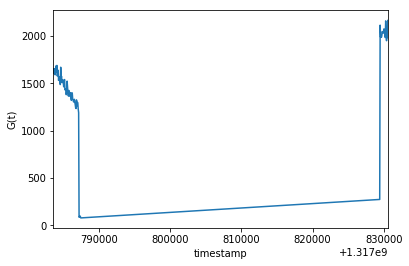

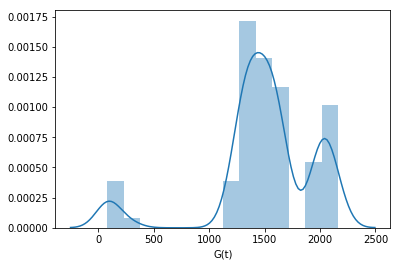

In [113]:
form_bins(60)

count     171.000000
mean      753.350877
std       228.578072
min        31.000000
25%       672.000000
50%       758.000000
75%       845.000000
max      1092.000000
Name: timestamp, dtype: float64


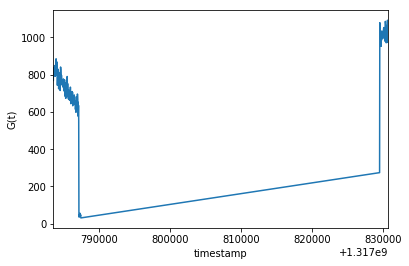

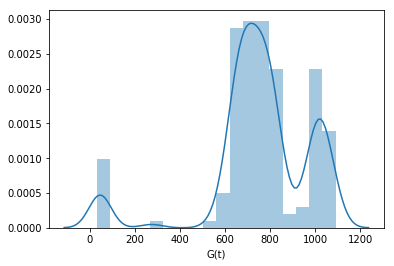

In [114]:
form_bins(30)

count    1699.000000
mean       75.822837
std        23.931041
min         1.000000
25%        66.000000
50%        76.000000
75%        90.000000
max       132.000000
Name: timestamp, dtype: float64


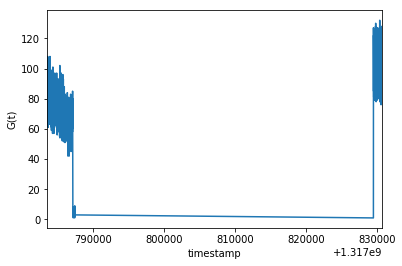

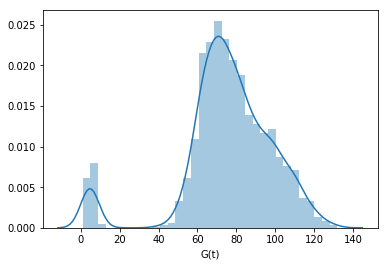

In [125]:
form_bins(3)

count    2544.000000
mean       50.637972
std        16.393264
min         1.000000
25%        43.000000
50%        51.000000
75%        60.000000
max        96.000000
Name: timestamp, dtype: float64


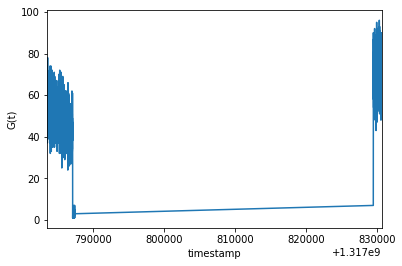

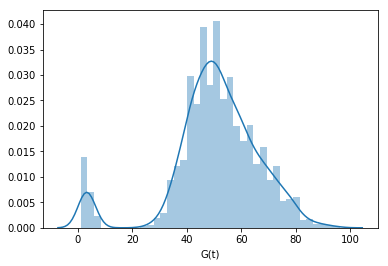

In [124]:
form_bins(2)

count    5038.000000
mean       25.570266
std         8.608354
min         1.000000
25%        21.000000
50%        26.000000
75%        31.000000
max        57.000000
Name: timestamp, dtype: float64


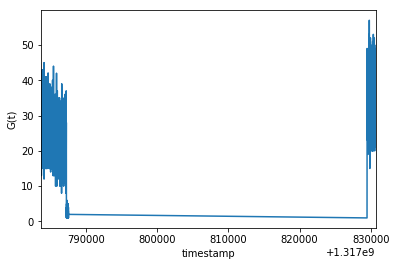

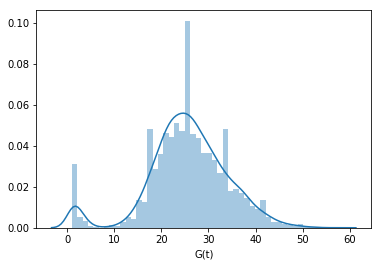

In [115]:
form_bins(1)

In [34]:
timestamp60=slice.timestamp//60*60
records60=slice.copy()
records60.timestamp=timestamp60
records60

,timestamp,id,clicked
350160,1317783600,id-572194,0
350161,1317783600,id-572582,0
350162,1317783600,id-569364,0
350163,1317783600,id-569270,0
350164,1317783600,id-573053,0
350165,1317783600,id-568437,0
350166,1317783600,id-569065,0
350167,1317783600,id-571705,0
350168,1317783600,id-572582,0
350169,1317783600,id-570846,0


In [116]:
timestamp30=slice.timestamp//30*30
records30=slice.copy()
records30.timestamp=timestamp30
records30

,timestamp,id,clicked
350160,1317783600,id-572194,0
350161,1317783600,id-572582,0
350162,1317783600,id-569364,0
350163,1317783600,id-569270,0
350164,1317783600,id-573053,0
350165,1317783600,id-568437,0
350166,1317783600,id-569065,0
350167,1317783600,id-571705,0
350168,1317783600,id-572582,0
350169,1317783600,id-570846,0


In [12]:
class Arm:
    def __init__(self):
        self.T = 0
        self.rewards = 0
        self.X = -1
    def __repr__(self):
        return '{:.4f} {}/{}'.format(self.X, self.rewards, self.T)
    

In [194]:
class Epsilon_z_greedy:
    def __init__(self, records=slice, pool=pool, G=slice.timestamp.value_counts()):
        self.G_ = Counter() # actual G(t) computed during playing
        self.records = records.itertuples() # optimal speed, sub-optimal space
        self.rewards = 0
        self.pool = {}
        self.G = G # estimation of G(t) counted from records
        for k in pool:
            self.pool[k] = Arm()
        self.best = None
        
    def update(self, record):
        self.pool[record.id].rewards += record.clicked
        self.pool[record.id].T += 1
        self.pool[record.id].X = self.pool[record.id].rewards / self.pool[record.id].T
        if not self.best:
            self.best = record.id
        else:
            self.best = max((self.best, record.id), key= lambda arm:self.pool[arm].X)

    def initialize(self, m=24):
        i=0
        while i<m:
            record = next(self.records) # raise StopIteration
            if record.id not in self.pool:
                continue
            if not self.pool[record.id].T: # not played
                self.G_[record.timestamp] += 1
                self.update(record)
                i+=1
    
    def play(self, n, m=24, z=31, threshold=.3):
        c=Counter()
        es=[]
        
        prev_time = None
        prev_pick = None
        bin_reward = 0
        k=250 # k>4/(best.X-2ndBest.X)
        t_ = 0 # number of rounds under the threshold z up to time t
        
        t=0
        while t<n:
            record = next(self.records) # raise StopIteration
            if record.id not in self.pool: # omit mortal articles
                continue
                
            if record.timestamp == prev_time: # still in the last time bin
                pick = prev_pick # lock recommendation
            else: # entering a new time bin
                if bin_reward != 0: # last time bin is valid
                    t+=1
                    self.rewards += bin_reward/self.G_[prev_time]*self.G[prev_time]
                bin_reward = 0
                
                if z!=None: # epsilon-z greedy
                    epsilon = 1 if t_==0 else min(1, k*m/t_)
                    es.append(epsilon)
                    if self.G[record.timestamp]<z:
                        t_ += 1
                        if random.random()<epsilon:
                            c['<z explore']+=1
                            pick = random.choice(list(self.pool))
                        else:
                            c['<z exploit']+=1
                            pick = self.best
                    else:
                        c['>=z']+=1
                        pick = self.best
                        
                else: # vallina epsilon greedy
                    epsilon = min(1, k*m/(t+25))
                    if random.random()<epsilon:
                        pick = random.choice(list(self.pool))
                    else:
                        pick = self.best

            if pick == record.id: # historical action matches proposed action
                self.G_[record.timestamp] += 1
                bin_reward += record.clicked
                self.update(record)
                
            prev_pick = pick
            prev_time = record.timestamp
        if bin_reward !=0:
            self.rewards += bin_reward/self.G_[prev_time]*self.G[prev_time]
        print(c)
        plt.plot(es)

Counter({'>=z': 13897, '<z explore': 8060, '<z exploit': 414})


24903.983333333337

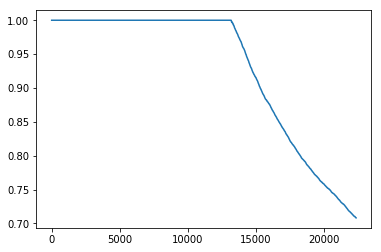

In [195]:
ezg = Epsilon_z_greedy(records=records, pool=pool, G=records.timestamp.value_counts())
ezg.initialize()
ezg.play(1000)
ezg.rewards

(1317783600.0, 1317787250)

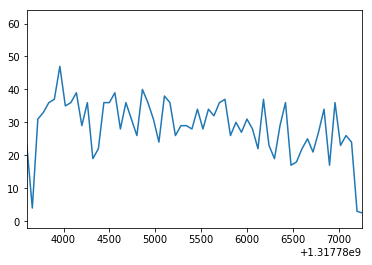

In [40]:
pd.Series(ezg.G_).plot()
plt.xlim(right=1317787250)

### time bin: 30s

In [117]:
l1=[]
l2=[]
for i in range(100):
    ezg = Epsilon_z_greedy(records=records30, pool=pool, G=records30.timestamp.value_counts())
    ezg.initialize()
    ezg.play(2000, z=845)
    l1.append(ezg.rewards)

    ezg2 = Epsilon_z_greedy(records=records30, pool=pool, G=records30.timestamp.value_counts())
    ezg2.initialize()
    ezg2.play(2000, z=None)
    l2.append(ezg2.rewards)
    
    print(i, end='\r', flush=True)

Text(0.5, 1.0, 'reward distributions')

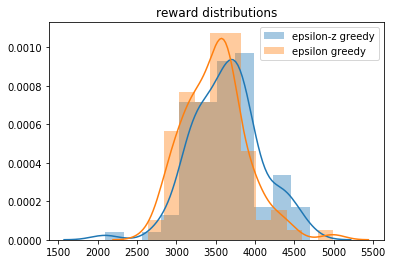

In [118]:
sns.distplot(l1, label='epsilon-z greedy')
sns.distplot(l2, label='epsilon greedy')
plt.legend()
plt.title('reward distributions')

In [119]:
ttest_ind(l1,l2)

Ttest_indResult(statistic=2.4262266053193, pvalue=0.016152710640750793)

### time bin: 60s

In [70]:
l1=[]
l2=[]
for i in range(100):
    ezg = Epsilon_z_greedy(records=records60, pool=pool, G=records60.timestamp.value_counts())
    ezg.initialize()
    ezg.play(2000, z=1680.5)
    l1.append(ezg.rewards)

    ezg2 = Epsilon_z_greedy(records=records60, pool=pool, G=records60.timestamp.value_counts())
    ezg2.initialize()
    ezg2.play(2000, z=None)
    l2.append(ezg2.rewards)
    
    print(i, end='\r', flush=True)

Text(0.5, 1.0, 'reward distributions')

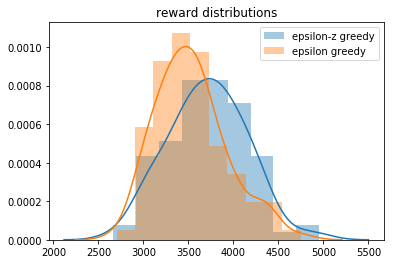

In [71]:
sns.distplot(l1, label='epsilon-z greedy')
sns.distplot(l2, label='epsilon greedy')
plt.legend()
plt.title('reward distributions')

In [75]:
ttest_ind(l1,l2)

Ttest_indResult(statistic=3.006600079828002, pvalue=0.002984115030247832)

In [14]:
ezg = Epsilon_z_greedy()
ezg.initialize()
ezg.play(2000)
ezg.rewards

1980.416666666667

(1317783600.0, 1317787250)

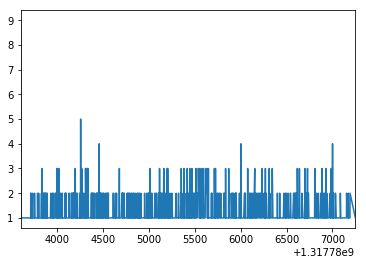

In [15]:
pd.Series(ezg.G_).plot()
plt.xlim(right=1317787250)

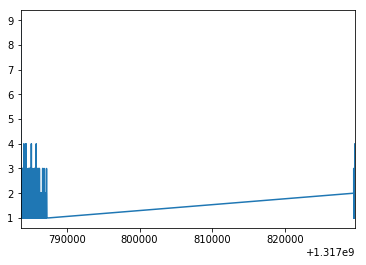

In [386]:
pd.Series(ezg.G_).plot()

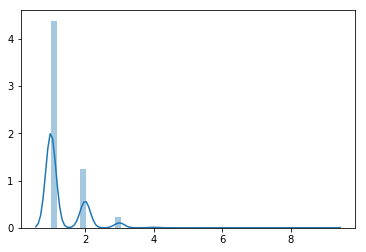

In [399]:
sns.distplot(pd.Series(ezg.G_))

In [45]:
l1=[]
l2=[]
for i in range(100):
    ezg = Epsilon_z_greedy()
    ezg.initialize()
    ezg.play(2000)
    l1.append(ezg.rewards)

    ezg2 = Epsilon_z_greedy()
    ezg2.initialize()
    ezg2.play(2000, z=None) # vallina epsilon
    l2.append(ezg2.rewards)
    
    print(i, end='\r', flush=True)

Text(0.5, 1.0, 'reward distributions')

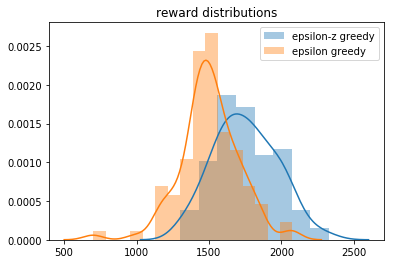

In [46]:
sns.distplot(l1, label='epsilon-z greedy')
sns.distplot(l2, label='epsilon greedy')
plt.legend()
plt.title('reward distributions')

In [264]:
l3=[]
for i in range(100):
    ezg3 = Epsilon_z_greedy()
    ezg3.initialize()
    ezg3.play(2000)
    l3.append(ezg3.rewards)

Text(0.5, 1.0, 'reward distributions')

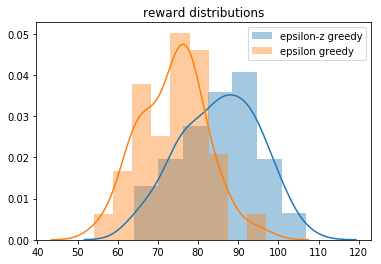

In [265]:
sns.distplot(l3, label='epsilon-z greedy')
sns.distplot(l2, label='epsilon greedy')
plt.legend()
plt.title('reward distributions')

In [48]:
from scipy.stats import ttest_ind

In [323]:
ttest_ind(l3,l2)

Ttest_indResult(statistic=8.954170552891155, pvalue=2.511963777284569e-16)